# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
#%reload_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 4.                                     # time limit of the episode
#runtime = 5.
init_pose = np.array([0., 0., 7., 0., 0., 0.])  # initial pose
#init_pose = np.array([0., 0., 10., 0., 0., 0.])
init_velocities = np.array([0., 0.1, 0.2])         # initial velocities
#init_velocities = np.array([0., 0., 0.])  
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

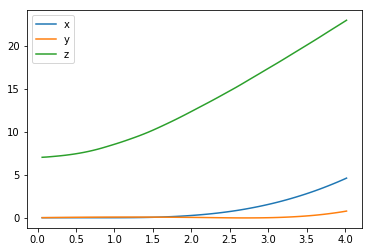

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

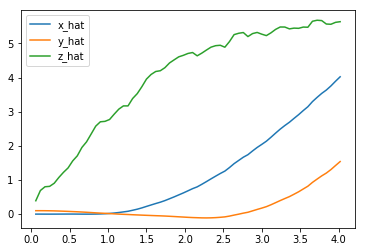

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

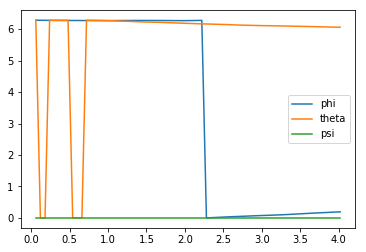

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

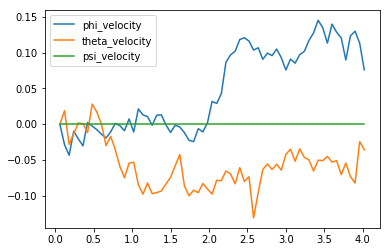

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

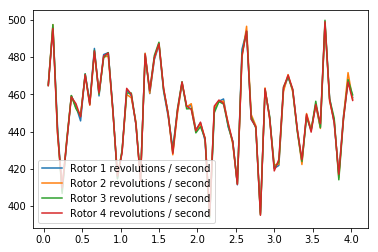

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  4.59818291   0.76947983  22.93798768   0.19317659   6.06083247   0.        ]
[ 4.0209223   1.53879626  5.63437597]
[ 0.0758479  -0.03579133  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [29]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 1891.817 (best = 1921.700), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [30]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import PolicySearch_Agent
from task import Task

num_episodes=700
init_pos = np.array([0., 0., 0., 0., 0., 0.])
target_pos=np.array([0., 0., 50.])
task=Task(init_pose=init_pos, target_pos=target_pos, runtime=5)
agent=PolicySearch_Agent(task) 
rewards=[]

for i_episode in range(1, num_episodes+1):
    state=agent.reset_episode() 
    step=0
    while True:
        step+=1
        action=agent.act(state) 
        next_state, reward, done=task.step(action)
        agent.step(action, reward, next_state, done)
        state=next_state
        if done:
            rewards.append(agent.score)
            print("\r\nEp={:4d}, score={:7.3f} (best={:7.3f}) pos={} {} {}".format(i_episode, agent.score, agent.best_score,
                task.sim.pose[:3][0],2,
                task.sim.pose[:3][1],2,
                task.sim.pose[:3][2],2), end="")
            break
    sys.stdout.flush()


Ep=   1, score=6902.296 (best=6902.296) pos=-0.011793467420809266 2 0.06770821338214009
Ep=   2, score=6902.297 (best=6902.297) pos=-0.011805164993018523 2 0.06771966807135417
Ep=   3, score=10354.011 (best=10354.011) pos=0.03340717982241428 2 0.13518906296119376
Ep=   4, score=8640.292 (best=10354.011) pos=-0.1420344664040273 2 0.27231042465262634
Ep=   5, score=6902.295 (best=10354.011) pos=-0.011778727057588255 2 0.06769478661399876
Ep=   6, score=6904.438 (best=10354.011) pos=-0.057008676215728304 2 0.13657604750303395
Ep=   7, score=6904.438 (best=10354.011) pos=-0.0570097625292234 2 0.13657583693921524
Ep=   8, score=6902.296 (best=10354.011) pos=-0.011797969172697724 2 0.06771286950061127
Ep=   9, score=10354.007 (best=10354.011) pos=0.033508191108492756 2 0.13511807359260372
Ep=  10, score=6904.438 (best=10354.011) pos=-0.05698948239589137 2 0.13658284375045285
Ep=  11, score=6904.437 (best=10354.011) pos=-0.05701039970339894 2 0.13656806163036805
Ep=  12, score=6902.297 (best

Ep=  94, score=6902.295 (best=10354.011) pos=-0.011774725104597471 2 0.06769624913417717
Ep=  95, score=6902.294 (best=10354.011) pos=-0.01176416486459684 2 0.0676844336020389
Ep=  96, score=6904.437 (best=10354.011) pos=-0.057010681644708745 2 0.13656912413772593
Ep=  97, score=10354.006 (best=10354.011) pos=0.03354806950350734 2 0.13507393881455626
Ep=  98, score=8640.291 (best=10354.011) pos=-0.14199833637215944 2 0.2723284334805009
Ep=  99, score=6902.297 (best=10354.011) pos=-0.011805772524819343 2 0.06772517989517453
Ep= 100, score=10354.005 (best=10354.011) pos=0.033583839704390314 2 0.13505464810644827
Ep= 101, score=8640.290 (best=10354.011) pos=-0.1420106253083145 2 0.2723289161906855
Ep= 102, score=6904.438 (best=10354.011) pos=-0.05699645644722791 2 0.1365830117316442
Ep= 103, score=6904.437 (best=10354.011) pos=-0.05699409496744025 2 0.1365774762197023
Ep= 104, score=6904.438 (best=10354.011) pos=-0.057005507386202046 2 0.13657731177578128
Ep= 105, score=8640.290 (best=103

Ep= 187, score=10354.007 (best=10354.013) pos=0.03351431287039519 2 0.13511024374663247
Ep= 188, score=6904.438 (best=10354.013) pos=-0.05700752691988714 2 0.13657627360201696
Ep= 189, score=8640.290 (best=10354.013) pos=-0.1419999158200241 2 0.27233055597134126
Ep= 190, score=6902.295 (best=10354.013) pos=-0.011761720742813224 2 0.0676876646338241
Ep= 191, score=8640.292 (best=10354.013) pos=-0.14201004246808213 2 0.2723221076671816
Ep= 192, score=8640.290 (best=10354.013) pos=-0.14201484827778038 2 0.2723209057056919
Ep= 193, score=8640.291 (best=10354.013) pos=-0.14204316259468425 2 0.2723067034771729
Ep= 194, score=10354.008 (best=10354.013) pos=0.03351584903416877 2 0.13510321371211426
Ep= 195, score=6904.438 (best=10354.013) pos=-0.05700167478690532 2 0.1365798854949196
Ep= 196, score=8640.289 (best=10354.013) pos=-0.1419987248140986 2 0.2723189847590612
Ep= 197, score=8640.292 (best=10354.013) pos=-0.1420224550721599 2 0.2723212399306056
Ep= 198, score=10354.006 (best=10354.013)

Ep= 280, score=8640.290 (best=10354.013) pos=-0.14198676035529262 2 0.27233711197602667
Ep= 281, score=6902.296 (best=10354.013) pos=-0.01177888171741202 2 0.06770441098570325
Ep= 282, score=6904.437 (best=10354.013) pos=-0.05699015594918124 2 0.13658035068402807
Ep= 283, score=8640.290 (best=10354.013) pos=-0.14199300005343338 2 0.2723272015871384
Ep= 284, score=10354.007 (best=10354.013) pos=0.03350892093282876 2 0.13510859802110559
Ep= 285, score=8640.291 (best=10354.013) pos=-0.14201156084365846 2 0.27231936816156543
Ep= 286, score=6902.296 (best=10354.013) pos=-0.01178674411161872 2 0.06770658232620963
Ep= 287, score=8640.291 (best=10354.013) pos=-0.1419924168326899 2 0.27233233422101566
Ep= 288, score=6902.296 (best=10354.013) pos=-0.011795468197392859 2 0.0677096041598419
Ep= 289, score=6904.438 (best=10354.013) pos=-0.05699743024177586 2 0.13658283408654437
Ep= 290, score=6904.437 (best=10354.013) pos=-0.05699004599010619 2 0.13657676823008366
Ep= 291, score=8640.291 (best=1035

Ep= 373, score=10354.010 (best=10354.013) pos=0.03342172118947611 2 0.13517668881772915
Ep= 374, score=10354.003 (best=10354.013) pos=0.033622676634046056 2 0.13503962772285352
Ep= 375, score=10354.009 (best=10354.013) pos=0.03346933180885152 2 0.13514534451593407
Ep= 376, score=6902.298 (best=10354.013) pos=-0.011817149891244362 2 0.0677370662767873
Ep= 377, score=8640.290 (best=10354.013) pos=-0.1419904668255792 2 0.2723401298331623
Ep= 378, score=10354.013 (best=10354.013) pos=0.03331989235195025 2 0.13525823509090357
Ep= 379, score=6904.437 (best=10354.013) pos=-0.05698764609642398 2 0.13658024530650983
Ep= 380, score=6902.294 (best=10354.013) pos=-0.011753363920178431 2 0.06768231093730338
Ep= 381, score=6902.297 (best=10354.013) pos=-0.011803655103795545 2 0.06771988327515151
Ep= 382, score=6904.438 (best=10354.013) pos=-0.05700036885415689 2 0.13658138134640038
Ep= 383, score=6904.438 (best=10354.013) pos=-0.05700274601085859 2 0.13658884199583965
Ep= 384, score=6904.437 (best=1

Ep= 466, score=10354.011 (best=10354.013) pos=0.03339787589255039 2 0.13518691525209817
Ep= 467, score=8640.290 (best=10354.013) pos=-0.1420069756125881 2 0.27231865284866924
Ep= 468, score=8640.291 (best=10354.013) pos=-0.14200607933940637 2 0.27231959304212205
Ep= 469, score=6902.296 (best=10354.013) pos=-0.011782240742306372 2 0.06770510679102695
Ep= 470, score=6904.437 (best=10354.013) pos=-0.056989391891931224 2 0.1365812590898892
Ep= 471, score=8640.291 (best=10354.013) pos=-0.14203908397938778 2 0.27231027082746
Ep= 472, score=6902.297 (best=10354.013) pos=-0.011798420709595593 2 0.06771747372773826
Ep= 473, score=10354.012 (best=10354.013) pos=0.0333606905077135 2 0.13521946526470507
Ep= 474, score=6904.438 (best=10354.013) pos=-0.05700808926389614 2 0.13657333965046284
Ep= 475, score=8640.292 (best=10354.013) pos=-0.1420440457796997 2 0.27230715593376315
Ep= 476, score=6904.437 (best=10354.013) pos=-0.05698218221112337 2 0.1365787099414844
Ep= 477, score=6904.438 (best=10354.0

Ep= 559, score=6902.296 (best=10354.013) pos=-0.011777476137595803 2 0.06770126702434387
Ep= 560, score=8640.291 (best=10354.013) pos=-0.14200851411876483 2 0.27232311968536654
Ep= 561, score=10354.011 (best=10354.013) pos=0.03334589380946602 2 0.13524239991941844
Ep= 562, score=8640.291 (best=10354.013) pos=-0.14206352452365503 2 0.27229988916551345
Ep= 563, score=6902.296 (best=10354.013) pos=-0.011794931743939648 2 0.06770926981605611
Ep= 564, score=10354.011 (best=10354.013) pos=0.033392703403557926 2 0.13519697690746893
Ep= 565, score=6902.297 (best=10354.013) pos=-0.011802057898258278 2 0.06772504619746147
Ep= 566, score=8640.290 (best=10354.013) pos=-0.14196493415712488 2 0.2723385577878967
Ep= 567, score=8640.290 (best=10354.013) pos=-0.14199464285941452 2 0.27232951347990897
Ep= 568, score=6902.297 (best=10354.013) pos=-0.01180168456581117 2 0.06771754320698974
Ep= 569, score=6904.437 (best=10354.013) pos=-0.05699089789233272 2 0.13657504182818528
Ep= 570, score=6902.296 (best

Ep= 651, score=6902.294 (best=10354.013) pos=-0.011758283138782761 2 0.06768320834165321
Ep= 652, score=6904.438 (best=10354.013) pos=-0.05700326672731666 2 0.13657684381033028
Ep= 653, score=10354.012 (best=10354.013) pos=0.03337353743929197 2 0.13520634164673914
Ep= 654, score=8640.290 (best=10354.013) pos=-0.14199322628523806 2 0.2723292740261673
Ep= 655, score=6904.437 (best=10354.013) pos=-0.057001942322424684 2 0.1365709695544202
Ep= 656, score=6904.438 (best=10354.013) pos=-0.056996396971914685 2 0.13658308905221483
Ep= 657, score=8640.292 (best=10354.013) pos=-0.14202427403047457 2 0.27231575265549957
Ep= 658, score=6902.294 (best=10354.013) pos=-0.0117484674342997 2 0.06767687851943271
Ep= 659, score=6904.437 (best=10354.013) pos=-0.057002085922569196 2 0.13656647842177885
Ep= 660, score=6904.437 (best=10354.013) pos=-0.05699672398608148 2 0.13657973168218432
Ep= 661, score=10354.009 (best=10354.013) pos=0.03345565054993015 2 0.13515308410183408
Ep= 662, score=10354.006 (best=

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

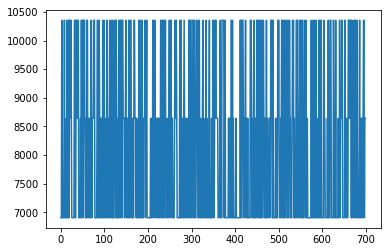

In [31]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rewards)
    

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I specified in task.py represents the straight take-off (the straight until a height defined in the target position). We include the current speed and angular velocity. We added a threshold for the distance to the target . If the "distance" is below the threshold, we get a reward (reward+=500). Also we added negative reward to control the stability of takeoff and deviation from  target.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I use Actor-Critic Method (DDPG algorithm). I tried diffrent neural networks, but I saw, that there is a little bit change in value, so I use next. I use hidden layers for actor and for critic. For actor I use 3 hidden layers, sizes was 32, 64 and 32, activation function='relu' (for output layer activation function='sigmoid'). For critic I also use hidden layers, for the action and state layers of the same size - one with size=32 and one with size=64. Activation function was 'relu'. The layers added and pass using another layer with activation function = 'relu'. At the end we have one layer for produce the q_value. As an optimizer for both classes (both metworks) I choose 'adam'

I tried different hyperparametrs (I increased them by 0.1-0.5 and decreased them by 0.1-0.5) and the best was theta=0.2, gamma=0.9, tau=0.1.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: The task to learn quadcopter how to fly was not very easy, I think it was rather hard. It was a gradual learning curve mixed with aha moment. In my task the quadcopter remains always near to the vertical axis and we can see the low error of hight (around zero). To controll quadcopter I add a threshold for the distance to the target . If the "distance" is below the threshold, we get a reward (reward+=500). I included negative reward to control stability of takeoff and flight as a whole. Adding of negative reward improved results. 
I think that final performance of the agent is good. Mean rewards over the last 10 episodes is 9325.88 (this value was 6660.46 before adding of negative reward).

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part of the project was specifying the task, I tried to add different values to make my task unique. I a little bit changed original example. Also train the agent was not very easy - I searched the best num of episodes.
We can see a frequent change in the value of the reward, so the agent learns to fly to the target. I think it's great! It would be good to improve the agent and be able to control the velocity.